ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-902569a5e710>", line 6, in <cell line: 0>
    sns.barplot(df)
  File "/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py", line 2380, in barplot
    p.plot_bars(
  File "/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py", line 1280, in plot_bars
    sub_data
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/groupby.py", line 1819, in apply
    return self._python_apply_general(f, self._obj_with_exclusions)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/groupby.py", line 1885, in _python_apply_general
    values, mutated = self._grouper.apply_groupwise(f, data, self.axis)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

TypeError: object of type 'NoneType' has no len()

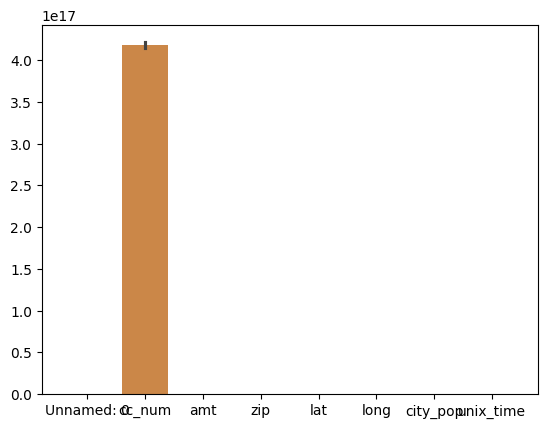

In [17]:
import pandas as pd
df=pd.read_csv("/content/fraudTest.csv")
df.head()
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(df)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [23]:
df.isnull().sum()
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [21]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['first']=le.fit_transform(df['first'])
df['last']=le.fit_transform(df['last'])
df['gender']=le.fit_transform(df['gender'])
df['street']=le.fit_transform(df['street'])
df['city']=le.fit_transform(df['city'])
df['state']=le.fit_transform(df['state'])

df['merchant']=le.fit_transform(df['merchant'])
df['category']=le.fit_transform(df['category'])
df['job']=le.fit_transform(df['job'])
df['cc_num']=le.fit_transform(df['cc_num'])
df['trans_num']=le.fit_transform(df['trans_num'])
df['dob']=le.fit_transform(df['dob'])
df['lat']=le.fit_transform(df['lat'])
df['long']=le.fit_transform(df['long'])
df['merch_lat']=le.fit_transform(df['merch_lat'])
df['merch_long']=le.fit_transform(df['merch_long'])
df['amt']=le.fit_transform(df['amt'])
df['unix_time']=le.fit_transform(df['unix_time'])
df['city_pop']=le.fit_transform(df['city_pop'])
df['is_fraud']=le.fit_transform(df['is_fraud'])
df['trans_num']=le.fit_transform(df['trans_num'])
df['trans_date_trans_time']=le.fit_transform(df['trans_date_trans_time'])
df['zip']=le.fit_transform(df['zip'])

df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,409,319,10,186,151,115,1,341,...,182,663,794,275,376,98699,0,114727,392332,0
1,1,1,552,591,10,2884,163,457,0,354,...,524,96,89,392,760,108785,1,277654,59408,0
2,2,2,596,611,5,4028,24,249,0,865,...,558,860,675,259,421,433979,2,332793,510508,0
3,3,3,583,222,9,5905,42,457,1,320,...,29,666,702,407,718,71993,3,19517,399880,0
4,4,4,470,292,13,219,247,261,1,548,...,808,523,254,196,177,190585,4,501776,305489,0


<Axes: >

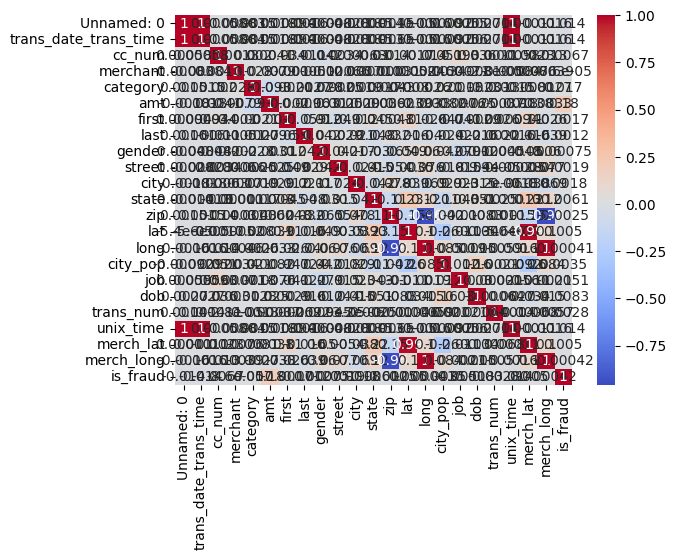

In [22]:
cdf=df.corr()
sns.heatmap(cdf,annot=True,cmap='coolwarm')

In [23]:
df=df.drop(columns=['unix_time','merch_lat','merch_long','zip','lat','long','trans_date_trans_time','Unnamed: 0'],axis=1,errors='ignore')
df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,trans_num,is_fraud
0,409,319,10,186,151,115,1,341,157,39,794,275,376,98699,0
1,552,591,10,2884,163,457,0,354,16,43,89,392,760,108785,0
2,596,611,5,4028,24,249,0,865,61,33,675,259,421,433979,0
3,583,222,9,5905,42,457,1,320,764,8,702,407,718,71993,0
4,470,292,13,219,247,261,1,548,247,21,254,196,177,190585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,199,507,5,4277,235,315,1,531,443,23,142,460,334,336391,0
555715,518,264,7,11084,171,424,1,540,401,42,666,198,890,70372,0
555716,798,496,7,8588,18,239,0,126,104,46,455,294,609,235088,0
555717,77,75,13,699,111,342,1,663,476,12,33,58,331,43546,0


In [24]:
x=df.drop(columns=['is_fraud'],axis=1)
y=df['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.24      0.03      0.05       426

    accuracy                           1.00    111144
   macro avg       0.62      0.51      0.52    111144
weighted avg       0.99      1.00      0.99    111144

[[110683     35]
 [   415     11]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
